In [2]:
import s3fs
import pandas as pd

# Create S3 filesystem using the 'saml-pub' AWS profile
# Requires access to the s3 bucket with stats
fs = s3fs.S3FileSystem(profile='saml-pub')

# Path to the S3 object with stats per level (137 levels)
s3_path = 's3://opera-adt/tropo/outputs/ECMWF_TROP_201606230600_201606230600_1.csv'

# Open the file and read with pandas
with fs.open(s3_path, 'rb') as f:
    df = pd.read_csv(f)

In [3]:
df

,lnsp_mean,lnsp_std,lnsp_min,lnsp_p1,lnsp_p5,lnsp_q1,lnsp_median,lnsp_q3,lnsp_p95,lnsp_p99,...,q_std,q_min,q_p1,q_p5,q_q1,q_median,q_q3,q_p95,q_p99,q_max
0,11.472239,0.116034,10.7472,11.019417,11.145638,11.485725,11.518929,11.526985,11.537971,11.543587,...,5.048240e-07,9.478209e-07,0.000001,0.000001,0.000002,0.000002,0.000003,0.000003,0.000003,0.000003
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030471e-07,1.164006e-06,0.000001,0.000001,0.000002,0.000003,0.000003,0.000004,0.000004,0.000004
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.113665e-07,1.271450e-06,0.000001,0.000001,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.333326e-07,1.415933e-06,0.000002,0.000002,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.868129e-07,1.468898e-06,0.000002,0.000002,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.736625e-03,9.009369e-06,0.000017,0.000070,0.003396,0.006242,0.012445,0.017892,0.019014,0.024560
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.756580e-03,6.910572e-06,0.000015,0.000060,0.003417,0.006271,0.012504,0.017928,0.019058,0.024688
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.779802e-03,4.823673e-06,0.000012,0.000051,0.003446,0.006307,0.012570,0.017987,0.019116,0.024793
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.811234e-03,3.210836e-06,0.000011,0.000041,0.003467,0.006351,0.012660,0.018070,0.019199,0.024982


In [4]:
data = [
    ["49r1", "2025-11-12", "HRES & ENS control unified; no resolution change"],
    ["48r1", "2023-06-27", "ENS resolution upgraded to 9 km; HRES unchanged"],
    ["47r3", "2021-10-12", "Assimilation tweaks; improved trop. cyclone prediction"],
    ["47r2", "2021-05-11", "Single-precision intro; ENS vertical resolution 91→137"],
    ["47r1", "2020-06-30", "No details given"],
    ["46r1", "2019-06-11", "Major DA upgrades; 1–5% error reduction"],
    ["45r1", "2018-06-05", "DA and physics changes; improved RH handling"],
    ["43r3", "2017-07-11", "DA and obs usage updates; positive HRES scores"],
    ["43r1", "2016-11-22", "ENS hourly fields to T+90; upper-air improvements"],
    ["41r2", "2016-03-08", "Horizontal resolution: HRES 9 km, ENS 18/36 km"],
    ["41r1", "2015-05-12", "Many system-wide updates; cyclone forecast improvement"],
    ["40r1", "2013-11-19", "ENS vertical resolution: 62 → 91 levels"],
]

df_cycles = pd.DataFrame(data, columns=["Cycle", "Date", "Summary"])
df_cycles["Date"] = pd.to_datetime(df_cycles["Date"])

In [5]:
import s3fs
import pandas as pd

# Create S3 filesystem using the 'saml-pub' AWS profile
fs = s3fs.S3FileSystem(profile='saml-pub')

# Prefix to list files in the S3 path
prefix = 'opera-adt/tropo/outputs/'

# List all CSV files under the prefix
csv_files = [f for f in fs.ls(prefix) if f.endswith('.csv')]
print("Found CSV files:", len(csv_files))

Found CSV files: 13411


In [6]:
from tqdm import tqdm
list_df = []
for ix in tqdm(csv_files):
    weather_date = pd.to_datetime(ix.split('/')[-1].split('_')[3], format="%Y%m%d%H%M")
    with fs.open(ix, 'rb') as f:
        df = pd.read_csv(f)
        df = df.copy()
        df['timestamp'] = weather_date 
        list_df.append(df)

100%|██████████| 13411/13411 [18:20<00:00, 12.18it/s]


In [7]:
all_stats = pd.concat(list_df)
ix =  [col for col in all_stats.columns if str(col).startswith("q")]
ix_min = [col for col in all_stats.columns if 'min' in str(col).lower()]
ix_max = [col for col in all_stats.columns if 'max' in str(col).lower()]
ix_p1 = [col for col in all_stats.columns if 'p1' in str(col).lower()]
ix_p99 = [col for col in all_stats.columns if 'p99' in str(col).lower()]

In [8]:
min_values = all_stats.groupby('timestamp')[ix_min].apply(lambda x: x.min(axis=0))
max_values = all_stats.groupby('timestamp')[ix_max].apply(lambda x: x.max(axis=0))
p1_values = all_stats.groupby('timestamp')[ix_p1].apply(lambda x: x.min(axis=0))
p99_values = all_stats.groupby('timestamp')[ix_p99].apply(lambda x: x.max(axis=0))

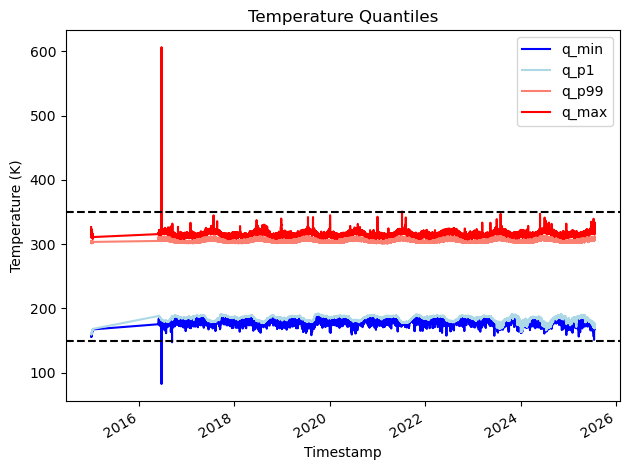

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Plotting with custom colors
min_values.plot(y='t_min', ax=ax, ylabel='Temperature (K)', legend=False, color='blue')
p1_values.plot(y='t_p1', ax=ax, legend=False, color='lightblue')
p99_values.plot(y='t_p99', ax=ax, legend=False, color='salmon')
max_values.plot(y='t_max', ax=ax, legend=False, color='red')

# Horizontal line at 150 and 350 K
ax.axhline(350, color='black', linestyle='--')
ax.axhline(150, color='black', linestyle='--')

# Optional: improve layout
ax.set_title('Temperature Quantiles')
ax.set_xlabel('Timestamp')
ax.legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')

plt.tight_layout()
plt.show()


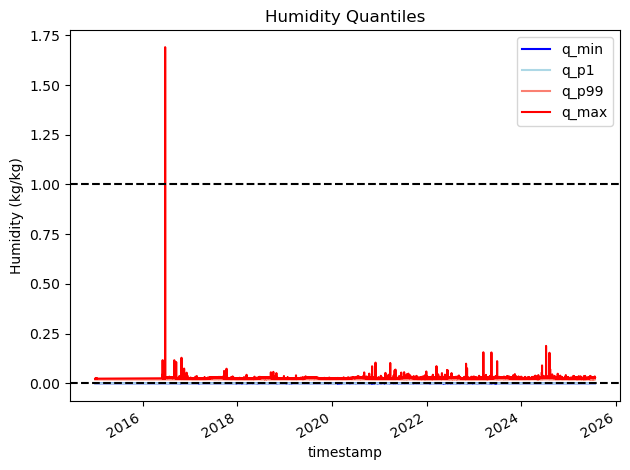

In [10]:
fig, ax = plt.subplots()

# Plotting with custom colors
min_values.plot(y='q_min', ax=ax, ylabel='Humidity (kg/kg)', legend=False, color='blue')
p1_values.plot(y='q_p1', ax=ax, legend=False, color='lightblue')
p99_values.plot(y='q_p99', ax=ax, legend=False, color='salmon')
max_values.plot(y='q_max', ax=ax, legend=False, color='red')

# Horizontal line at 0 and 1 
ax.axhline(0, color='black', linestyle='--')
ax.axhline(1, color='black', linestyle='--')

ax.set_title('Humidity Quantiles')
ax.legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')

plt.tight_layout()
plt.show()


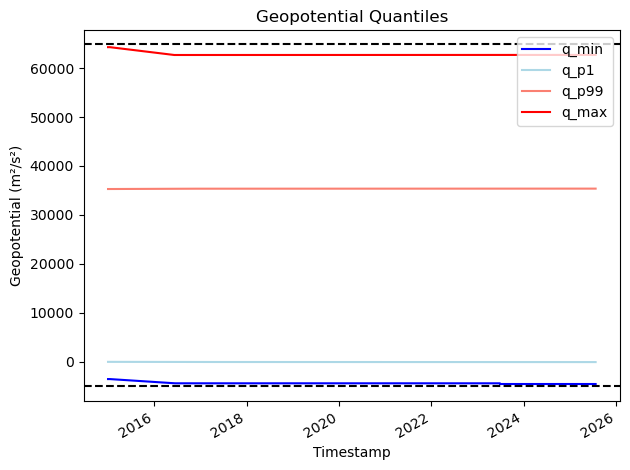

In [11]:
fig, ax = plt.subplots()

# Plotting with custom colors
min_values.plot(y='z_min', ax=ax, ylabel='Geopotential (m²/s²)', legend=False, color='blue')
p1_values.plot(y='z_p1', ax=ax, legend=False, color='lightblue')
p99_values.plot(y='z_p99', ax=ax, legend=False, color='salmon')
max_values.plot(y='z_max', ax=ax, legend=False, color='red')

# Horizontal line at 0 and 1 
ax.axhline(-5000, color='black', linestyle='--')
ax.axhline(65000, color='black', linestyle='--')

ax.set_title('Geopotential Quantiles')
ax.set_xlabel('Timestamp')
ax.legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')
plt.tight_layout()
plt.show()

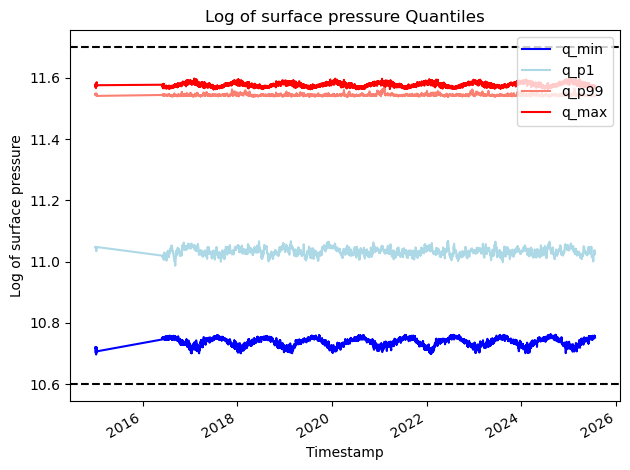

In [12]:
fig, ax = plt.subplots()

# Plotting with custom colors
min_values.plot(y='lnsp_min', ax=ax, ylabel='Log of surface pressure', legend=False, color='blue')
p1_values.plot(y='lnsp_p1', ax=ax, legend=False, color='lightblue')
p99_values.plot(y='lnsp_p99', ax=ax, legend=False, color='salmon')
max_values.plot(y='lnsp_max', ax=ax, legend=False, color='red')

# Horizontal line at 0 and 1 
ax.axhline(10.6, color='black', linestyle='--')
ax.axhline(11.7, color='black', linestyle='--')

ax.set_title('Log of surface pressure Quantiles')
ax.set_xlabel('Timestamp')
ax.legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')
plt.tight_layout()
plt.show()

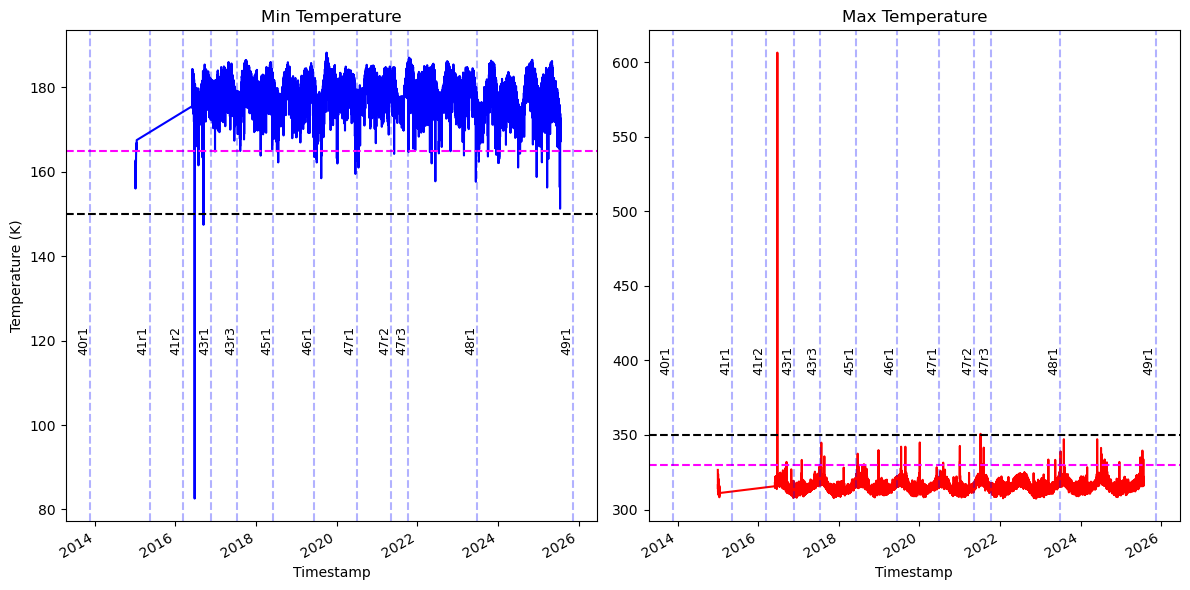

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Plotting with custom colors
min_values.plot(y='t_min', ax=ax[0], ylabel='Temperature (K)', legend=False, color='blue')
#p1_values.plot(y='z_p1', ax=ax[0], legend=False, color='lightblue')
#p99_values.plot(y='z_p99', ax=ax[1], legend=False, color='salmon')
max_values.plot(y='t_max', ax=ax[1], legend=False, color='red')

# Horizontal line at 0 and 1 
ax[0].axhline(150, color='black', linestyle='--')
ax[1].axhline(350, color='black', linestyle='--')
ax[0].axhline(165, color='magenta', linestyle='--')
ax[1].axhline(330, color='magenta', linestyle='--')
ax[0].set_title('Min Temperature')
ax[1].set_title('Max Temperature')
ax[0].set_xlabel('Timestamp')
ax[1].set_xlabel('Timestamp')

for _, row in df_cycles.iterrows():
    for a in ax: a.axvline(row["Date"], color="blue", linestyle="--", alpha=0.3, label='cycle')
    ax[0].text(row["Date"], 120, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)
    ax[1].text(row["Date"], 400, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)


plt.tight_layout()
plt.show()

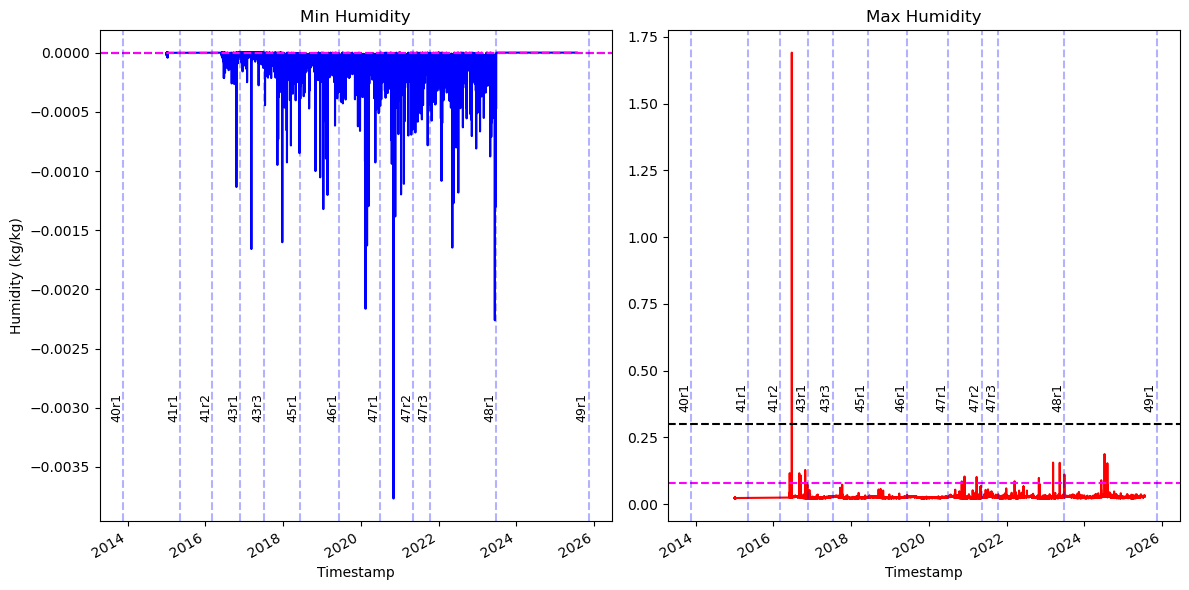

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Plotting with custom colors
min_values.plot(y='q_min', ax=ax[0], ylabel='Humidity (kg/kg)', legend=False, color='blue')
#p1_values.plot(y='z_p1', ax=ax[0], legend=False, color='lightblue')
#p99_values.plot(y='z_p99', ax=ax[1], legend=False, color='salmon')
max_values.plot(y='q_max', ax=ax[1], legend=False, color='red')

# Horizontal line at 0 and 1 
ax[0].axhline(0, color='black', linestyle='--')
ax[1].axhline(0.3, color='black', linestyle='--')
ax[0].axhline(0, color='magenta', linestyle='--')
ax[1].axhline(0.08, color='magenta', linestyle='--')
ax[0].set_title('Min Humidity')
ax[1].set_title('Max Humidity')
ax[0].set_xlabel('Timestamp')
ax[1].set_xlabel('Timestamp')

for _, row in df_cycles.iterrows():
    for a in ax: a.axvline(row["Date"], color="blue", linestyle="--", alpha=0.3, label='cycle')
    ax[0].text(row["Date"], -0.003, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)
    ax[1].text(row["Date"], 0.4, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)

plt.tight_layout()
plt.show()

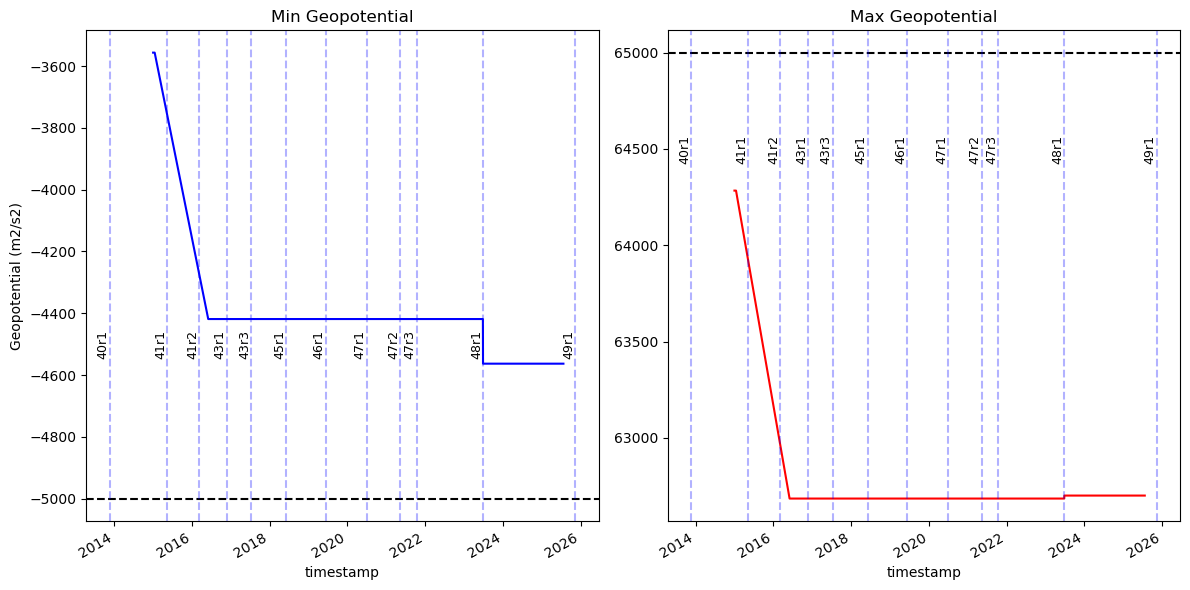

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Plotting with custom colors
min_values.plot(y='z_min', ax=ax[0], ylabel='Geopotential (m2/s2)', legend=False, color='blue')
#p1_values.plot(y='z_p1', ax=ax[0], legend=False, color='lightblue')
#p99_values.plot(y='z_p99', ax=ax[1], legend=False, color='salmon')
max_values.plot(y='z_max', ax=ax[1], legend=False, color='red')


# Horizontal line at 0 and 1 
ax[0].axhline(-5000, color='black', linestyle='--')
ax[1].axhline(65000, color='black', linestyle='--')
ax[0].set_title('Min Geopotential')
ax[1].set_title('Max Geopotential')

for _, row in df_cycles.iterrows():
    for a in ax: a.axvline(row["Date"], color="blue", linestyle="--", alpha=0.3, label='cycle')
    ax[0].text(row["Date"], -4500, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)
    ax[1].text(row["Date"], 64500, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)


plt.tight_layout()
plt.show()

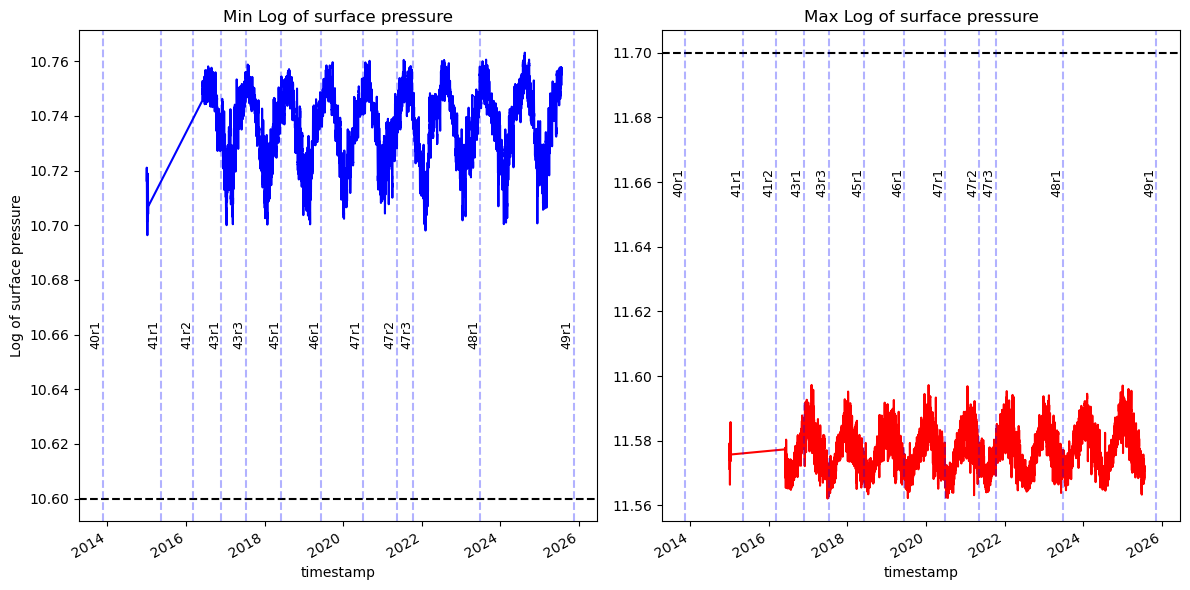

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Plotting with custom colors
min_values.plot(y='lnsp_min', ax=ax[0], ylabel='Log of surface pressure', legend=False, color='blue')
#p1_values.plot(y='z_p1', ax=ax[0], legend=False, color='lightblue')
#p99_values.plot(y='z_p99', ax=ax[1], legend=False, color='salmon')
max_values.plot(y='lnsp_max', ax=ax[1], legend=False, color='red')


# Horizontal line at 0 and 1 
ax[0].axhline(10.6, color='black', linestyle='--')
ax[1].axhline(11.7, color='black', linestyle='--')
ax[0].set_title('Min Log of surface pressure')
ax[1].set_title('Max Log of surface pressure')

for _, row in df_cycles.iterrows():
    for a in ax: a.axvline(row["Date"], color="blue", linestyle="--", alpha=0.3, label='cycle')
    ax[0].text(row["Date"], 10.66, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)
    ax[1].text(row["Date"], 11.66, row["Cycle"], rotation=90, va='center', ha='right', fontsize=9)


plt.tight_layout()
plt.show()

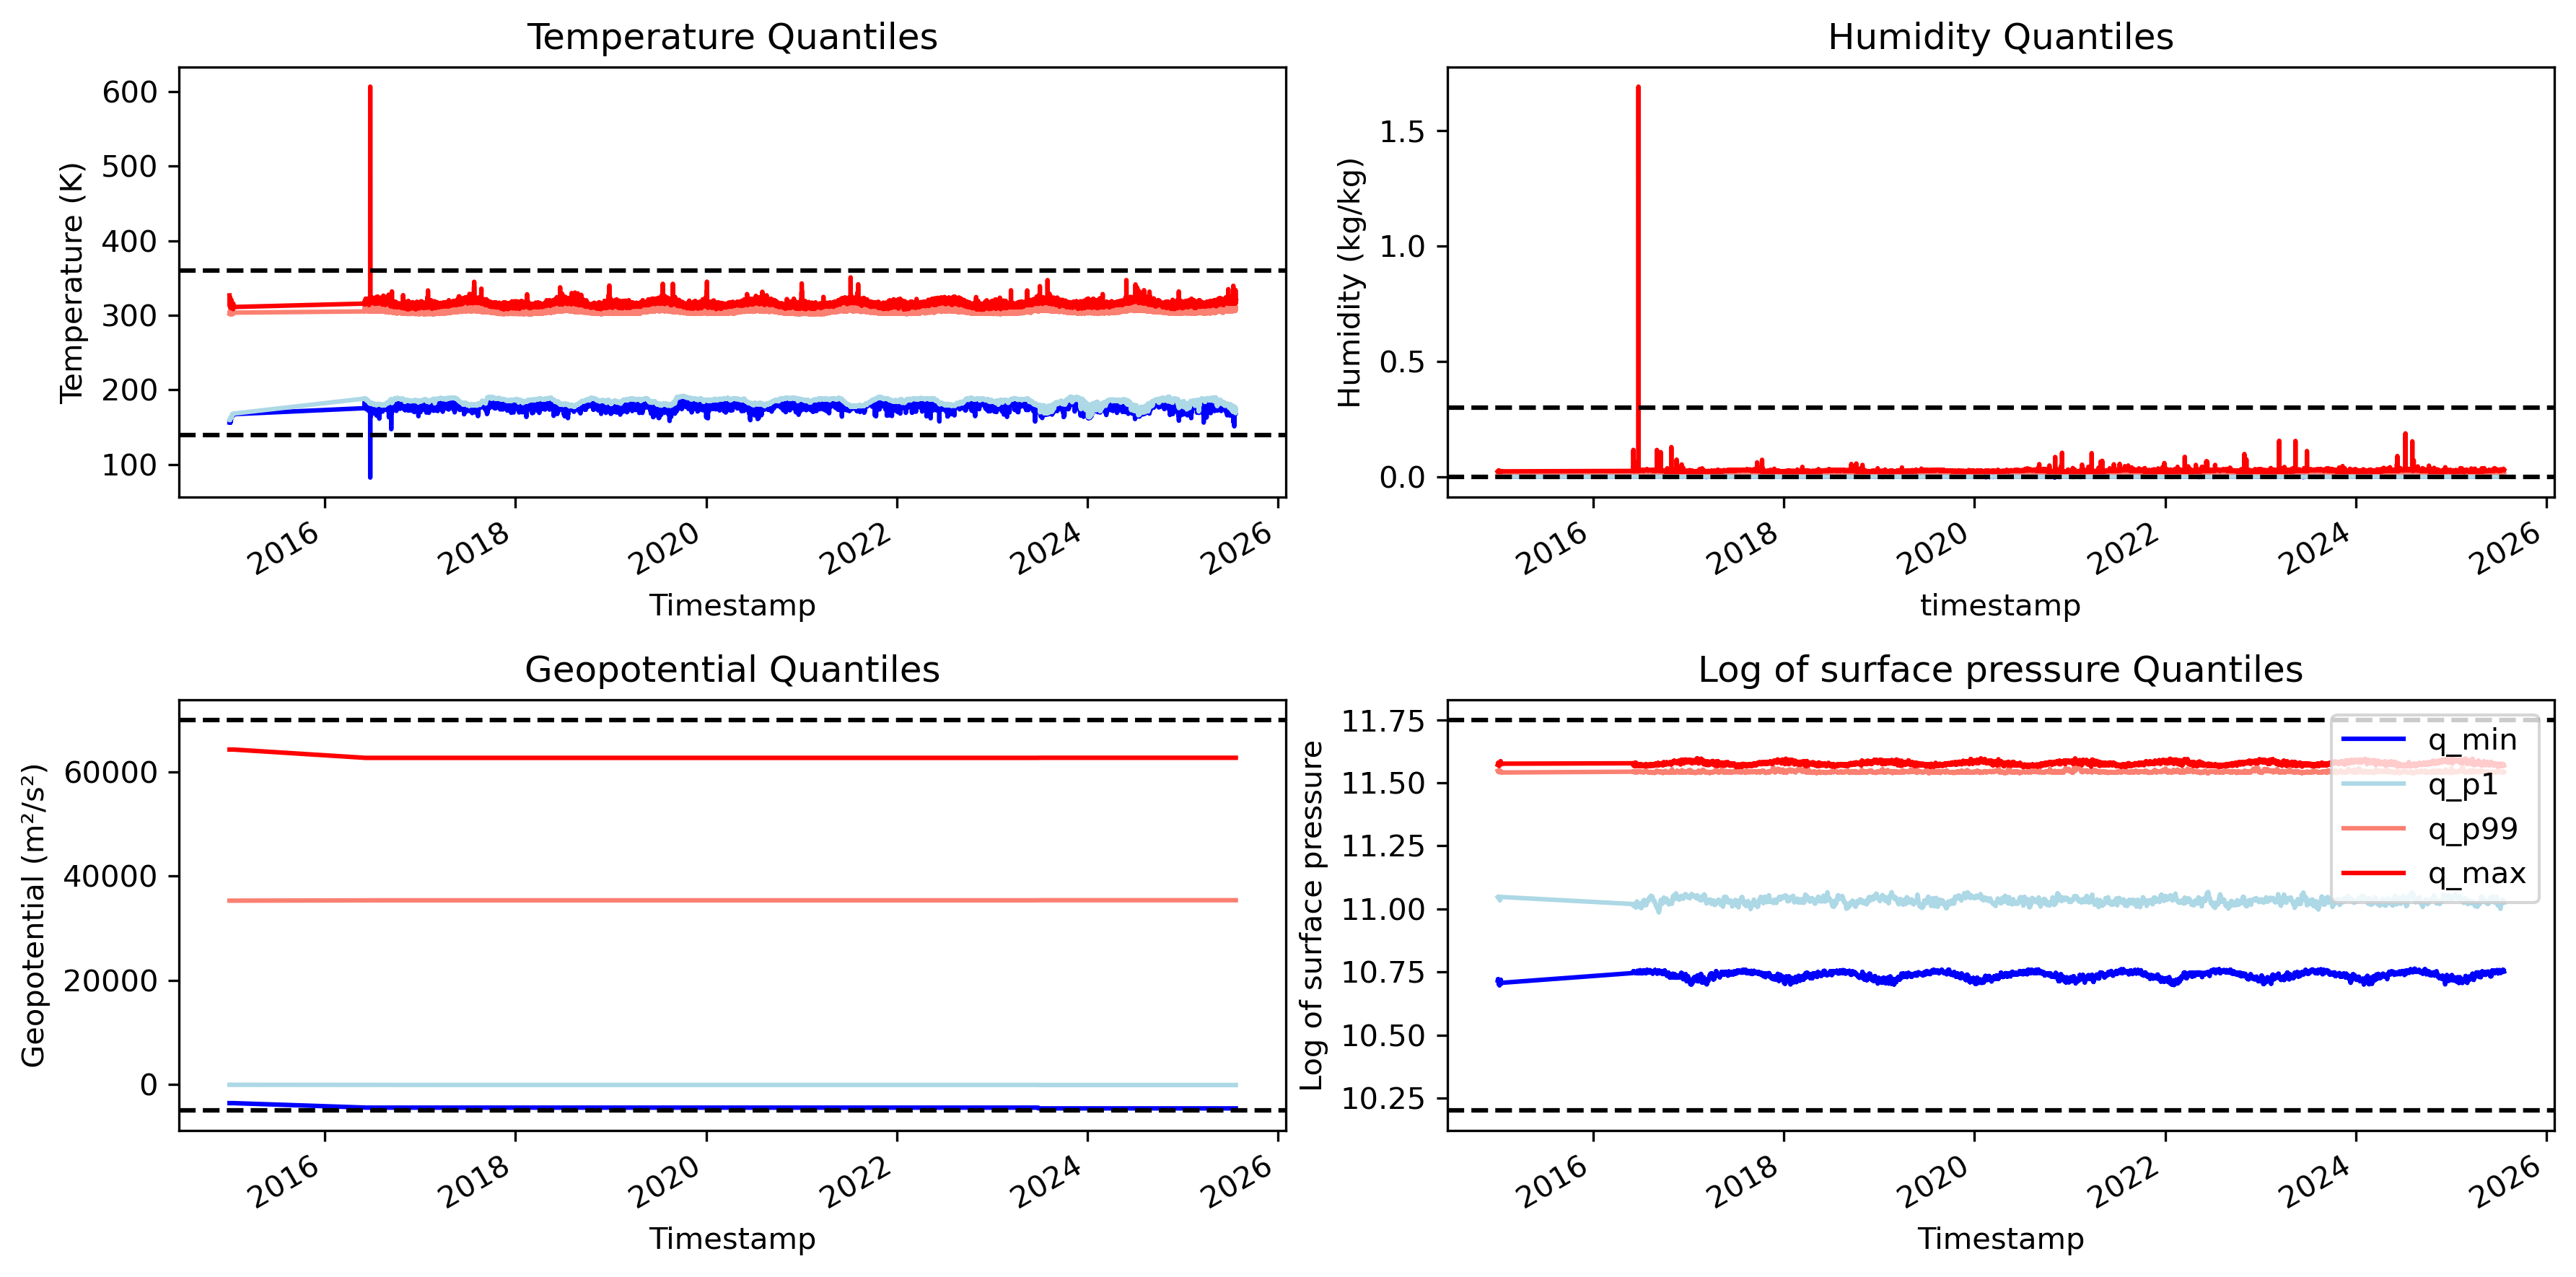

In [21]:
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=300)

# Plotting with custom colors
min_values.plot(y='t_min', ax=ax[0,0], ylabel='Temperature (K)', legend=False, color='blue')
p1_values.plot(y='t_p1', ax=ax[0,0], legend=False, color='lightblue')
p99_values.plot(y='t_p99', ax=ax[0,0], legend=False, color='salmon')
max_values.plot(y='t_max', ax=ax[0,0], legend=False, color='red')

# Horizontal line at 150 and 350 K
ax[0,00].axhline(360, color='black', linestyle='--')
ax[0,0].axhline(140, color='black', linestyle='--')

# Optional: improve layout
ax[0,0].set_title('Temperature Quantiles')
ax[0,0].set_xlabel('Timestamp')
#ax[0].legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')

# Plotting with custom colors
min_values.plot(y='q_min', ax=ax[0,1], ylabel='Humidity (kg/kg)', legend=False, color='blue')
p1_values.plot(y='q_p1', ax=ax[0,1], legend=False, color='lightblue')
p99_values.plot(y='q_p99', ax=ax[0,1], legend=False, color='salmon')
max_values.plot(y='q_max', ax=ax[0,1], legend=False, color='red')

# Horizontal line at 0 and 1 
ax[0,1].axhline(0, color='black', linestyle='--')
ax[0,1].axhline(0.3, color='black', linestyle='--')

ax[0,1].set_title('Humidity Quantiles')
#ax[1].legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')


min_values.plot(y='z_min', ax=ax[1,0], ylabel='Geopotential (m²/s²)', legend=False, color='blue')
p1_values.plot(y='z_p1', ax=ax[1,0], legend=False, color='lightblue')
p99_values.plot(y='z_p99', ax=ax[1,0], legend=False, color='salmon')
max_values.plot(y='z_max', ax=ax[1,0], legend=False, color='red')

# Horizontal line at 0 and 1 
ax[1,0].axhline(-5000, color='black', linestyle='--')
ax[1,0].axhline(70000, color='black', linestyle='--')

ax[1,0].set_title('Geopotential Quantiles')
ax[1,0].set_xlabel('Timestamp')
#ax[1,0].legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')

# Plotting with custom colors
min_values.plot(y='lnsp_min', ax=ax[1,1], ylabel='Log of surface pressure', legend=False, color='blue')
p1_values.plot(y='lnsp_p1', ax=ax[1,1], legend=False, color='lightblue')
p99_values.plot(y='lnsp_p99', ax=ax[1,1], legend=False, color='salmon')
max_values.plot(y='lnsp_max', ax=ax[1,1], legend=False, color='red')

# Horizontal line at 0 and 1 
ax[1,1].axhline(10.2, color='black', linestyle='--')
ax[1,1].axhline(11.75, color='black', linestyle='--')

ax[1,1].set_title('Log of surface pressure Quantiles')
ax[1,1].set_xlabel('Timestamp')
ax[1,1].legend(['q_min', 'q_p1', 'q_p99', 'q_max'], loc='upper right')


plt.tight_layout()
plt.show()

In [18]:
import numpy as np

t_mask = (min_values.t_min < 150) | (max_values.t_max > 350)
q_mask = (min_values.q_min < 0) | (max_values.q_max > 1)
z_mask = (min_values.z_min < -5000) | (max_values.z_max > 65000)
lnsp_mask = (min_values.lnsp_min < 10.6) | (max_values.lnsp_max > 11.7)

("t", np.count_nonzero(t_mask),
 "q", np.count_nonzero(q_mask) ,
 "z", np.count_nonzero(z_mask) ,
 "lnsp", np.count_nonzero(z_mask))


('t', 3, 'q', 10250, 'z', 0, 'lnsp', 0)

In [19]:
min_values[t_mask.values]

,lnsp_min,z_min,t_min,q_min
timestamp,,,,
2016-06-23 06:00:00,10.747200,-4418.774902,82.575386,-0.000013
2016-09-11 18:00:00,10.748646,-4418.774902,147.426300,-0.000012
2021-07-08 00:00:00,10.750957,-4418.774902,176.189133,-0.000067


In [20]:
max_values[t_mask.values]

,lnsp_max,z_max,t_max,q_max
timestamp,,,,
2016-06-23 06:00:00,11.570198,62685.226562,606.282715,1.690430
2016-09-11 18:00:00,11.572620,62685.226562,316.238800,0.040649
2021-07-08 00:00:00,11.570537,62685.226562,350.779205,0.028159
